## **Implémentation d'une regression logistique**

In [95]:
from config import *

In [96]:
# Importation des données
df = pd.read_csv(r'C:\Users\HP1\OneDrive\Bureau\PROJETS_DATA\Projet_Credit_Card_Model\Data\Credit-Card-Train-Clean.csv')

In [97]:
# Encodage des variables catégorielles
cat_df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']]
num_df = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]


In [98]:
# Sélectionner les variables explicatives et la variable d'intérêt
X = df[[ 'Married', 'Dependents', 'Education', 'Credit_History', 'Property_Area', 'Gender',
        'ApplicantIncome', 'LoanAmount', 'Self_Employed', 'CoapplicantIncome', 'Loan_Amount_Term', ]]
y = df['Loan_Status'].map({'Y': 1, 'N': 0}) # Encodage de la variable cible

In [ ]:
# Initialiser le OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
one_hot_encoded = one_hot_encoder.fit_transform(X[cat_columns])
encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(cat_columns))

# Concaténer le DataFrame encodé avec le reste des données
X = pd.concat([X.drop(columns=cat_columns), encoded_df], axis=1)

# Afficher le DataFrame final
X

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,128.0,0.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,128.0,1508.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3000,66.0,0.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,2583,120.0,2358.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,6000,141.0,0.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
610,4106,40.0,0.0,180.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
611,8072,253.0,240.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
612,7583,187.0,0.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Diviser les données avec stratification pour conserver la distribution des classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Vérification de la répartition des classes dans les ensembles d'entraînement et de test
print(y_train.value_counts())
print(y_test.value_counts())



Loan_Status
1    316
0    144
Name: count, dtype: int64
Loan_Status
1    106
0     48
Name: count, dtype: int64


In [101]:
print('X_train taille : ' , X_train.shape)
print('X_test taille : ' ,X_test.shape)
print('y_train taille : ' ,y_train.shape)
print('y_test taille : ' ,y_test.shape)

X_train taille :  (460, 14)
X_test taille :  (154, 14)
y_train taille :  (460,)
y_test taille :  (154,)


In [102]:
y_train.head()

1      0
394    1
316    1
62     0
158    1
Name: Loan_Status, dtype: int64

In [ ]:
# Liste des colonnes à standardiser
cols_to_scale = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer la transformation sur X_train et X_test
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Vérification après standardisation
print("✅ Valeurs moyennes après standardisation (doivent être proches de 0) :")
print(X_train[cols_to_scale].mean())

print("\n✅ Écart-type après standardisation (doivent être proches de 1) :")
print(X_train[cols_to_scale].std())


✅ Valeurs moyennes après standardisation (doivent être proches de 0) :
ApplicantIncome      4.054728e-17
LoanAmount          -1.621891e-16
CoapplicantIncome   -7.723291e-18
Loan_Amount_Term     9.267949e-17
dtype: float64

✅ Écart-type après standardisation (doivent être proches de 1) :
ApplicantIncome      1.001089
LoanAmount           1.001089
CoapplicantIncome    1.001089
Loan_Amount_Term     1.001089
dtype: float64


In [104]:
X_train.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
1,-0.147551,-0.230268,-0.019100,0.279720,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
394,-0.373109,-0.402801,-0.058929,0.279720,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
316,-0.279266,-0.322286,-0.575233,0.279720,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
62,-0.447788,0.195312,0.696718,-2.537899,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
158,-0.391360,-0.322286,0.192953,0.279720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#  Réajouter la constante
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

#  Entraîner le modèle Logit
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()

#  Afficher le résumé du modèle
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.479428
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  460
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                           14
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.2286
Time:                        02:29:54   Log-Likelihood:                -220.54
converged:                       True   LL-Null:                       -285.90
Covariance Type:            nonrobust   LLR p-value:                 4.901e-21
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.7879      0.564     -4.945      0.000      -3.893   

Rapport de classification pour le test :
              precision    recall  f1-score   support

           0       0.51      0.85      0.64        48
           1       0.91      0.63      0.74       106

    accuracy                           0.70       154
   macro avg       0.71      0.74      0.69       154
weighted avg       0.78      0.70      0.71       154

Matrice de confusion pour le test :
[[41  7]
 [39 67]]
Rapport de classification pour l'entraînement :
              precision    recall  f1-score   support

           0       0.47      0.72      0.57       144
           1       0.83      0.63      0.72       316

    accuracy                           0.66       460
   macro avg       0.65      0.68      0.64       460
weighted avg       0.72      0.66      0.67       460

Matrice de confusion pour l'entraînement :
[[104  40]
 [117 199]]


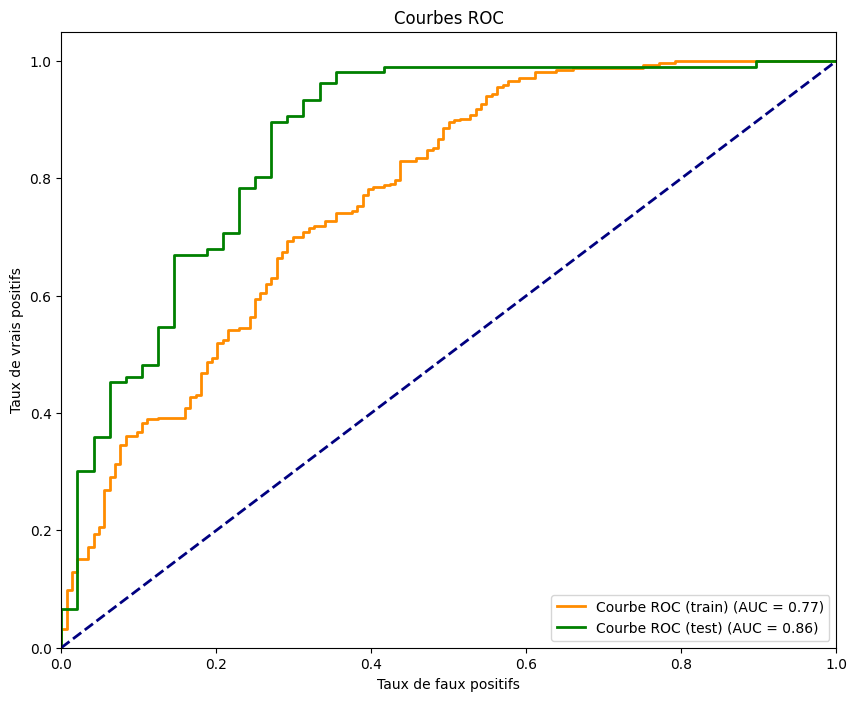

In [ ]:
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Prédire les classes sur la base de test avec un seuil de 0.6
y_test_pred_class = (y_test_pred > 0.6).astype(int)
y_train_pred_class = (y_train_pred > 0.6).astype(int)

# Générer le rapport de classification pour le test
print("Rapport de classification pour le test :")
print(classification_report(y_test, y_test_pred_class))

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test :")
print(confusion_matrix(y_test, y_test_pred_class)) 

# Générer le rapport de classification pour l'entraînement
print("Rapport de classification pour l'entraînement :")
print(classification_report(y_train, y_train_pred_class))

# Afficher la matrice de confusion pour l'entraînement
print("Matrice de confusion pour l'entraînement :")
print(confusion_matrix(y_train, y_train_pred_class))

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Courbe ROC (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Courbe ROC (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()


Valeurs uniques de y_train avant conversion : [0 1]
Avant l'oversampling, la distribution des classes : Counter({1: 316, 0: 144})
Après l'oversampling, la distribution des classes : Counter({0: 316, 1: 316})
Optimization terminated successfully.
         Current function value: 0.509370
         Iterations 7


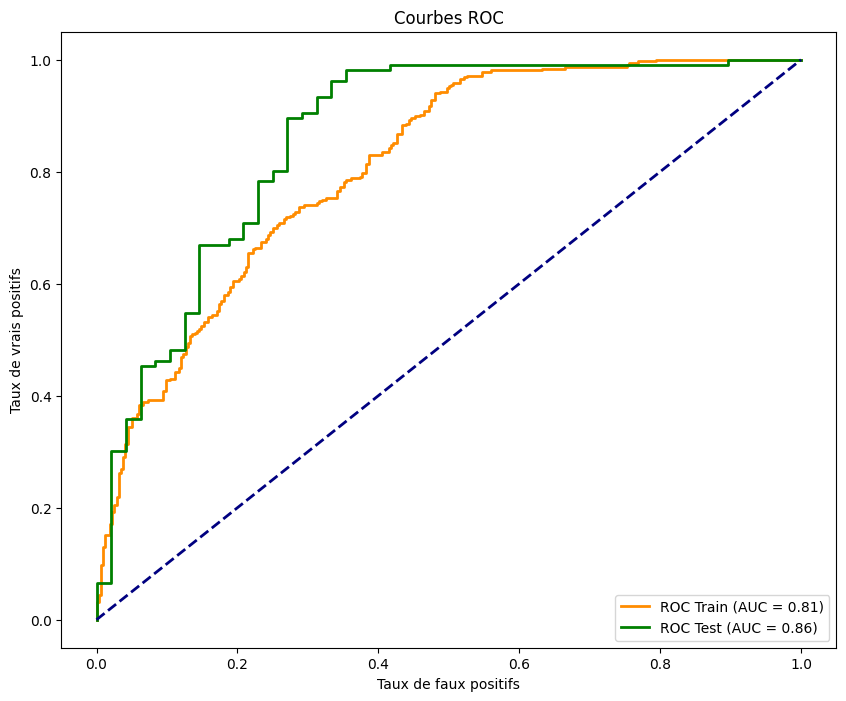

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  632
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                           14
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.2651
Time:                        02:29:41   Log-Likelihood:                -321.92
converged:                       True   LL-Null:                       -438.07
Covariance Type:            nonrobust   LLR p-value:                 1.298e-41
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.3236      0.576     -7.502      0.000      -5.453      -3.194
ApplicantIncome             0.1054      0.146      0.722      0.470      -0.181       0.391


In [ ]:
# Vérification de y_train avant SMOTE
print("Valeurs uniques de y_train avant conversion :", np.unique(y_train))

# Vérification de la distribution avant oversampling
print("Avant l'oversampling, la distribution des classes :", Counter(y_train))

# Appliquer SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Après l'oversampling, la distribution des classes :", Counter(y_train_resampled))

# Entraîner la régression logistique
logit_model = sm.Logit(y_train_resampled, X_train_resampled)
result = logit_model.fit()

# Prédictions sur les ensembles de test et d'entraînement
y_train_pred = result.predict(X_train_resampled)
y_test_pred = result.predict(X_test)

# Calcul des courbes ROC et AUC
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Affichage des courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC Train (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC Test (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

# Afficher le résumé du modèle
print(result.summary())
